<h1><center>EDA to Prediction - DieTanic</center></h1>

<img src="https://www.sciencesetavenir.fr/assets/img/2020/09/29/cover-r4x3w1200-5f72f22378110-sto-wer-titanic.jpg" alt="Gravure du Titanic qui coule" title="Le titanic coule">

```> Basé sur le notebook : https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic/notebook```

_Created by Charley Lebarbier_

> ___L'objectif de ce notebook est de donner une idée de comment se déroule le flux de travail dans n'importe quel problème de modélisation prédictive.___

__Au Programme :__
- Partie 1 : Analyse exploratoire des données (EDA : Exploratory Data Analysis) 
    1. Analyse des caractéristiques
    2. Trouver des relations ou tendances en considérant plusieurs caractéristiques
- Partie 2 : Ingénierie des caractèristiques et Data Cleaning 
    1. Ajouter quelques nouvelles compétences
    2. Supprimer les caractéristiques redondantes
    3. Convertir les compétences dans une forme approprié pour la modélisation
- Partie 3 : Modélisation Prédictive
    1. Exécution des algorithmes de base
    2. Validation croisée
    3. Ensembling
    4. Extraction des caractéristiques importantes



## Partie 1 : EDA

In [44]:
# import des librairies nécessaires à notre analyse : numpy, pandas, matplotlib, seaborn et warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

In [45]:
data = pd.read_csv('train.csv')
data.head()   # On regarde les premières lignes afin d'avoir une idée du contenu

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
# On regarde le totale des valeurs nulles
data.isnull().sum()

# Age, Cabin et Embarked contiennent des valeurs nulles, on fixera ça plus tard

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

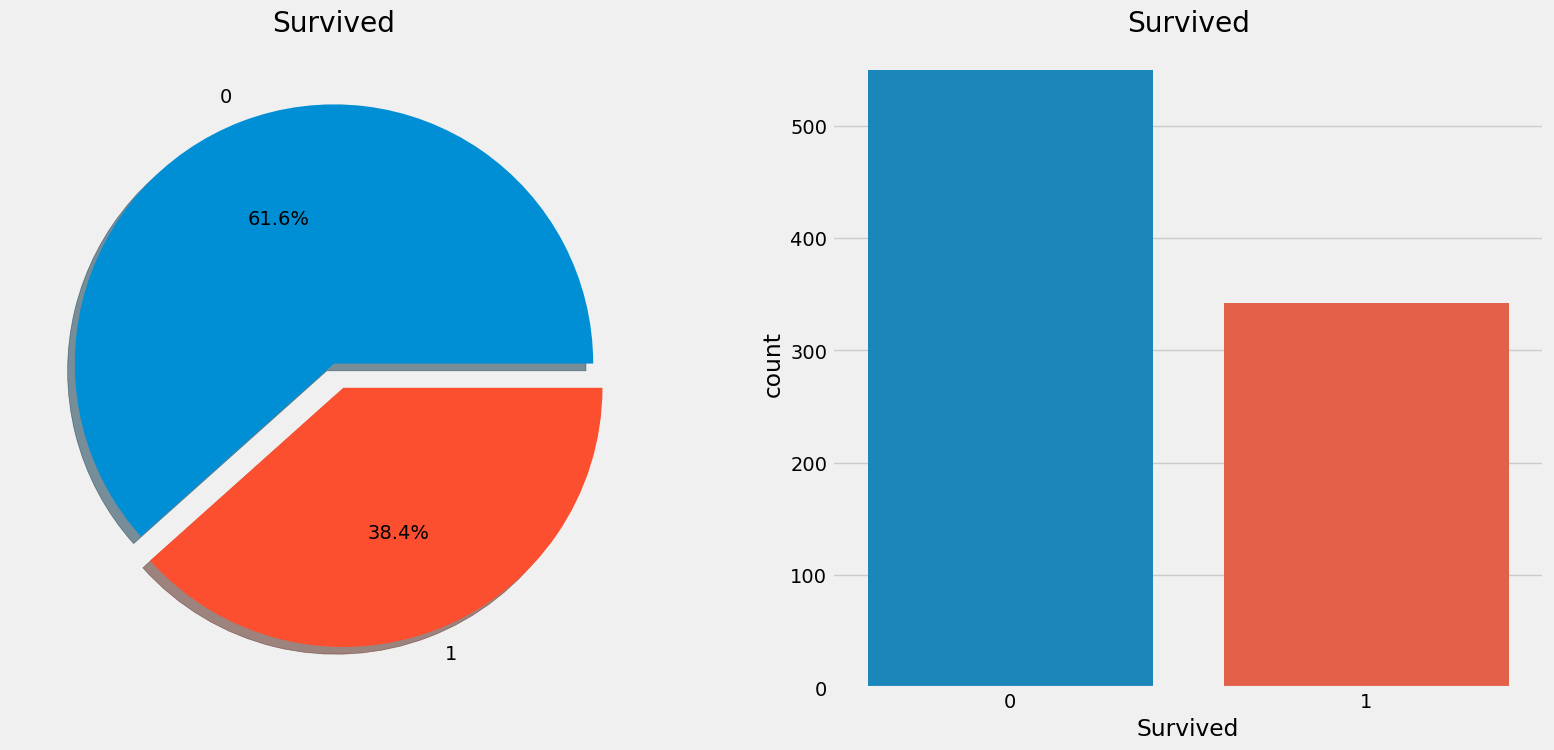

In [47]:
# création des graphs pour visualiser les données 'survivants' via PyPlot (OOP)

f, ax = plt.subplots(1, 2, figsize = (18, 8))

ax[0].set_title('Survived')
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
    autopct = '%1.1f%%', ax=ax[0], shadow = True)
ax[0].set_ylabel('')

ax[1].set_title('Survived')
sns.countplot(data=data, x='Survived', ax=ax[1])

plt.show()

# Sur les 891 passagers seulement 350 ont survécu, soit 38,4% (en orange)

On trouve trois types de caractères :

- Caractéristique catégorielle :
    Variable catégorielle (ou variable nominale) est une variable qui a deux catégories ou plus et chaque valeur de cette caractéristique peut être catégorisée par celles-ci. Il n'est pas possible de trier ou de donner un ordre quelconque à ces variables.
    Exemple : le sexe est une variable catégorielle ayant deux catégories -> homme et femme.

- Caractéristique ordinale :
    Variable ordinale est similaire aux valeurs catégorielles, mais la différence entre elles est que nous pouvons avoir un ordre ou un tri relatif entre les valeurs. 
    Exemple : Caractéristique de taille avec les valeurs Grand, Moyen, Petit (ordinal)

- Caractéristique continue :
    Une caractéristique est continue si elle peut prendre des valeurs entre deux points quelconques ou entre les valeurs minimum et maximum dans la colonne des caractéristiques.
    Exemple: l'Age

### Analyse des caractéristiques

In [48]:
# Nombre de survivants et morts selon le sexe des passagers
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

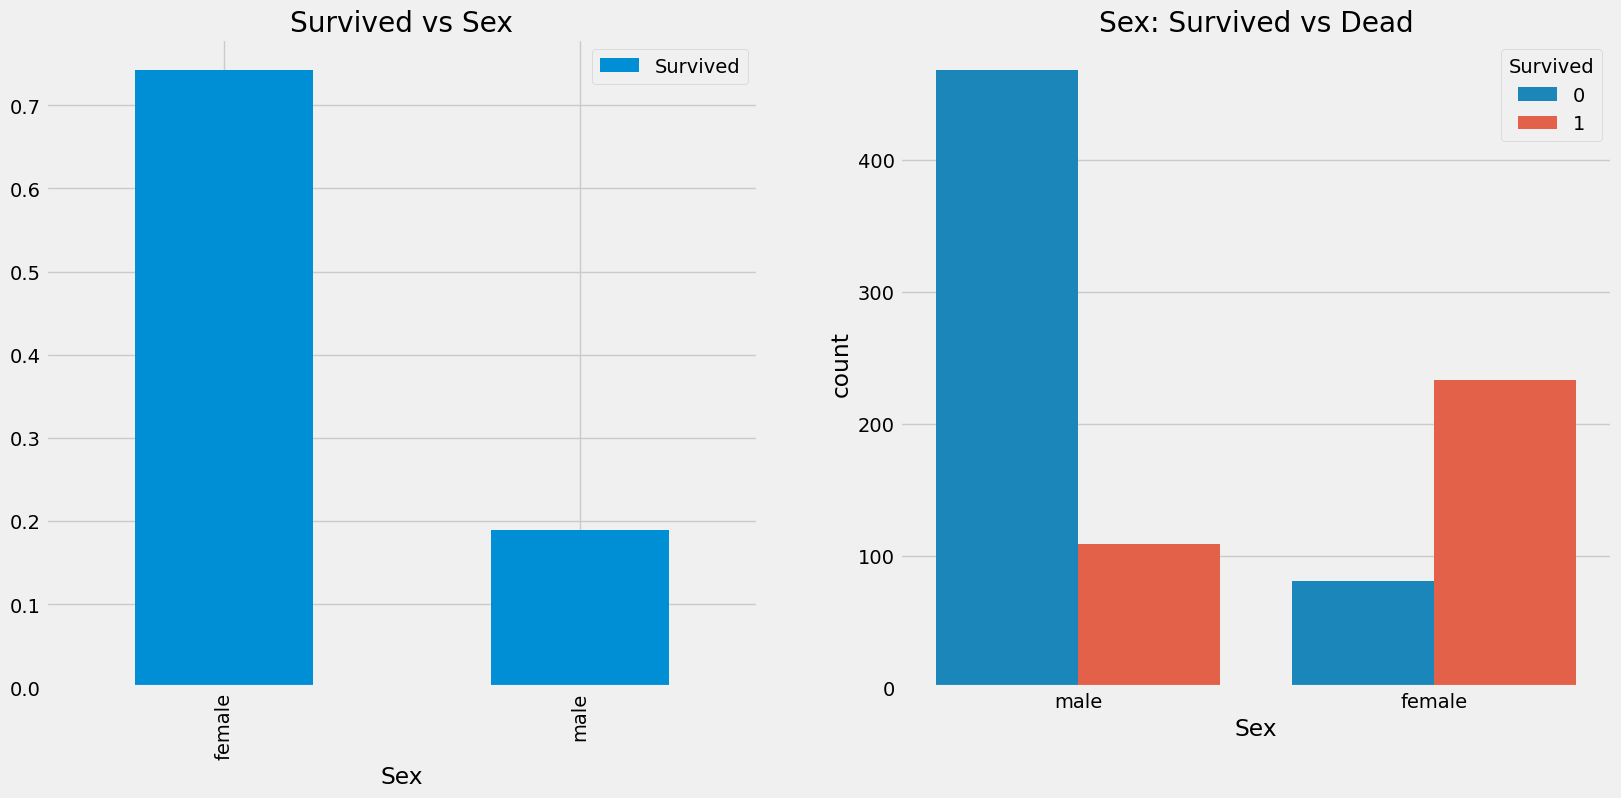

In [49]:
# Création de la visualisation = (Survivants selon sexe) et (Survivants/Morts selon Sexe)

f, ax=plt.subplots(1, 2, figsize=(18,8))

ax[0].set_title('Survived vs Sex')
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot(data=data, x='Sex', ax=ax[1], hue='Survived')

plt.show()

# Ici les femmes ont survécu à 75% contrairement aux hommes (18-19%)

In [50]:
# Tableau pour visualiser les survivants selon sa classe
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


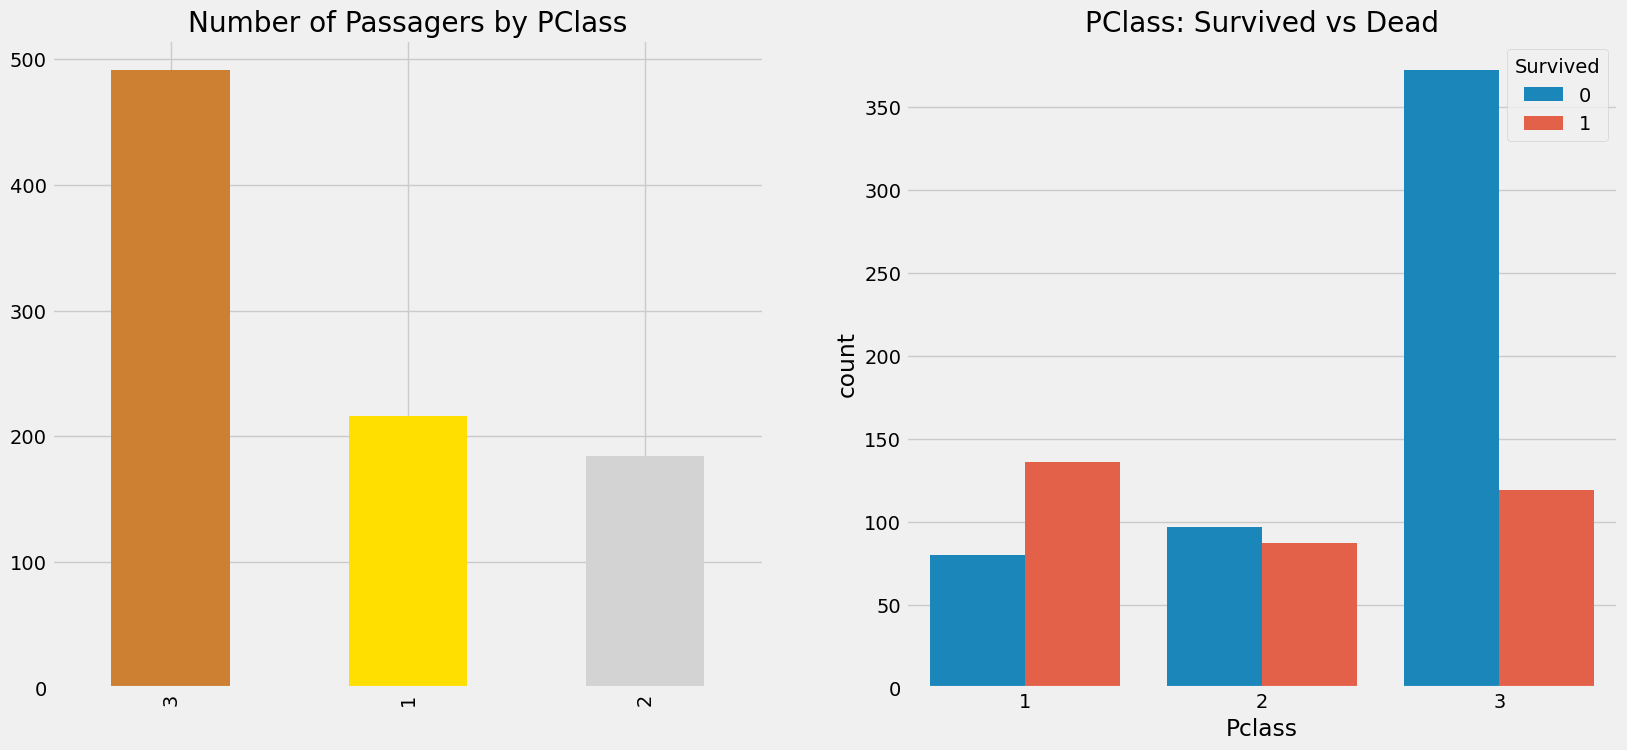

In [51]:
# Création de la visualisation : 
# (Nombre de passagers selon les classes) et (Survivants/Morts selon la Classe)

f, ax=plt.subplots(1, 2, figsize=(18,8))

ax[0].set_title('Number of Passagers by PClass')
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[1].set_ylabel('Count')

ax[1].set_title('PClass: Survived vs Dead')
sns.countplot(data=data, x='Pclass', ax=ax[1], hue='Survived')

plt.show()

# Les personnes de 1er Classe ont davantage survécu, 63%
# pour 48% de la 2e Classe ou 25% environ de la 3e. 

In [52]:
# Regardons maintenant le taux de survie selon le sex et la classe
# Créons le tableau croisé
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

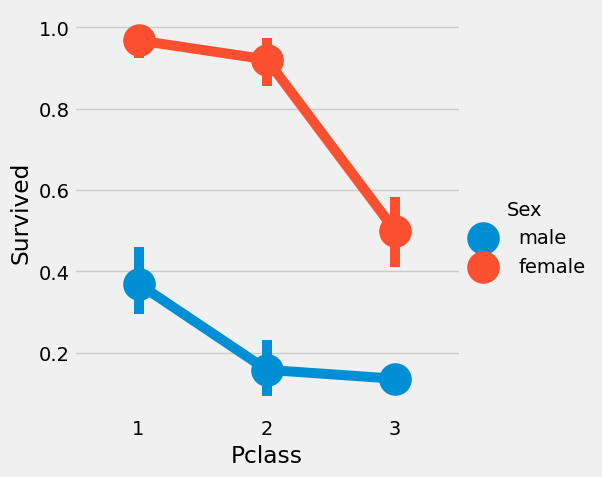

In [53]:
# Visualisation des survivants selon le sexe et la classe
sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', kind='point')
plt.show()

# On peut voir que les femmes de 1e Classe ont survécu à hauteur de 95-96%
# (soit 3 femmes sur 94), mais la classe seule ne joue pas, car même les 
# hommes de 1er Classe ont un taux de survie très bas ("37-38%")

In [54]:
# Age des passagers

print("Oldest passager was of:", data['Age'].max(), "years.")
print("Youngest passager was of:", data['Age'].min(), "years.")
print("Average Age on the ship:", data['Age'].mean(), "years.")

Oldest passager was of: 80.0 years.
Youngest passager was of: 0.42 years.
Average Age on the ship: 29.69911764705882 years.


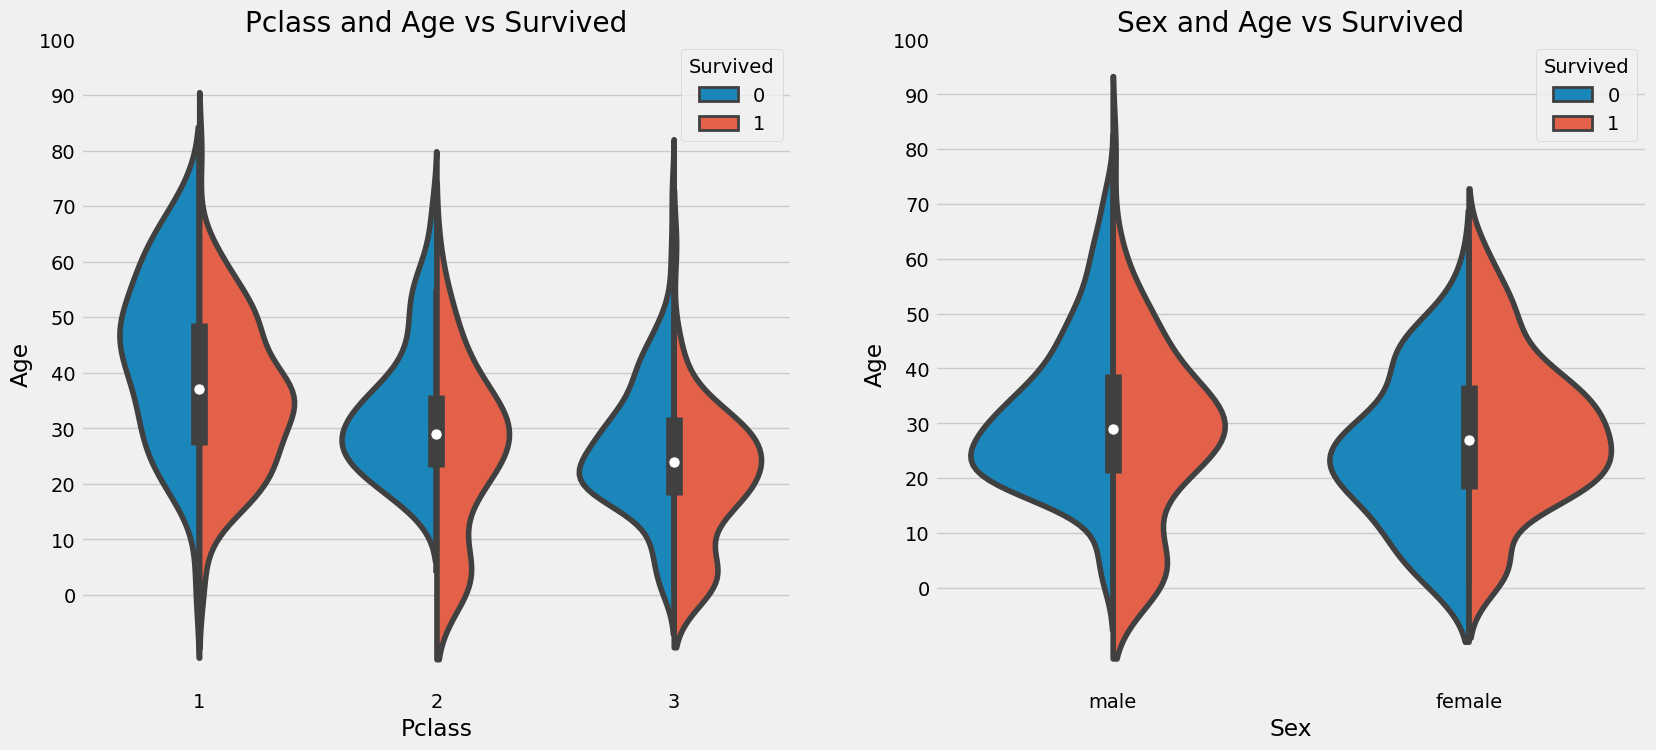

In [55]:
# Création de la visualisation :
# (Classe/Age vs Survivants) et (Sex/Age vs Survivants)

f, ax = plt.subplots(1, 2, figsize=(18,8))

ax[0].set_title("Pclass and Age vs Survived")
sns.violinplot(data=data, x='Pclass', y='Age', hue='Survived', split=True, ax=ax[0])
ax[0].set_yticks(range(0, 110, 10))

ax[1].set_title("Sex and Age vs Survived")
sns.violinplot(data=data, x='Sex', y='Age', hue='Survived', split=True, ax=ax[1])
ax[1].set_yticks(range(0, 110, 10))

plt.show()

# Ici, on voit que les enfants de - de 10ans peut importe la classe ont été sauvés

Plus haut nous avons vu que nous avions des valeurs nulles (177) dans la colonne Age.
Nous pouvons maintenant remplacer celles-ci par la moyenne.

/!\ - Il serait idiot de donner 29ans à un enfant de 4 ans.
Il y a un moyen de savoir la tranche d'age d'un passager grâce à la colonne Nom, où le qualitatif apparait
ex: M., Mrs., Miss, Lord...

In [56]:
# On extrait les Initials (Mrs., M.) qui finissent par un . via un regex
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

# Et on regarde les Initials selon le sexe
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [57]:
# Néanmoins, il y a des Initials mals orthographiés : Mme, Mlle au lieu de Miss.
# On procéde donc au nettoyage en les remplacant par l'orthographe qui convient.

data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess',
                         'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],['Miss', 
                         'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 
                         'Other', 'Mr', 'Mr', 'Mr'], inplace = True)

# Ce qui nous pour la moyenne des ages selon les Initials/
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [58]:
# Maintenant nous pouvons changer les NaN Values avec la bonne moyenne d'age selon les Initials

data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [59]:
# Nous vérifions que l'on a plus aucune valeur null dans notre dataset
data.Age.isnull().any()     # retourne False pour indiquer qu'il n'y a aucune valeur null trouvée

False

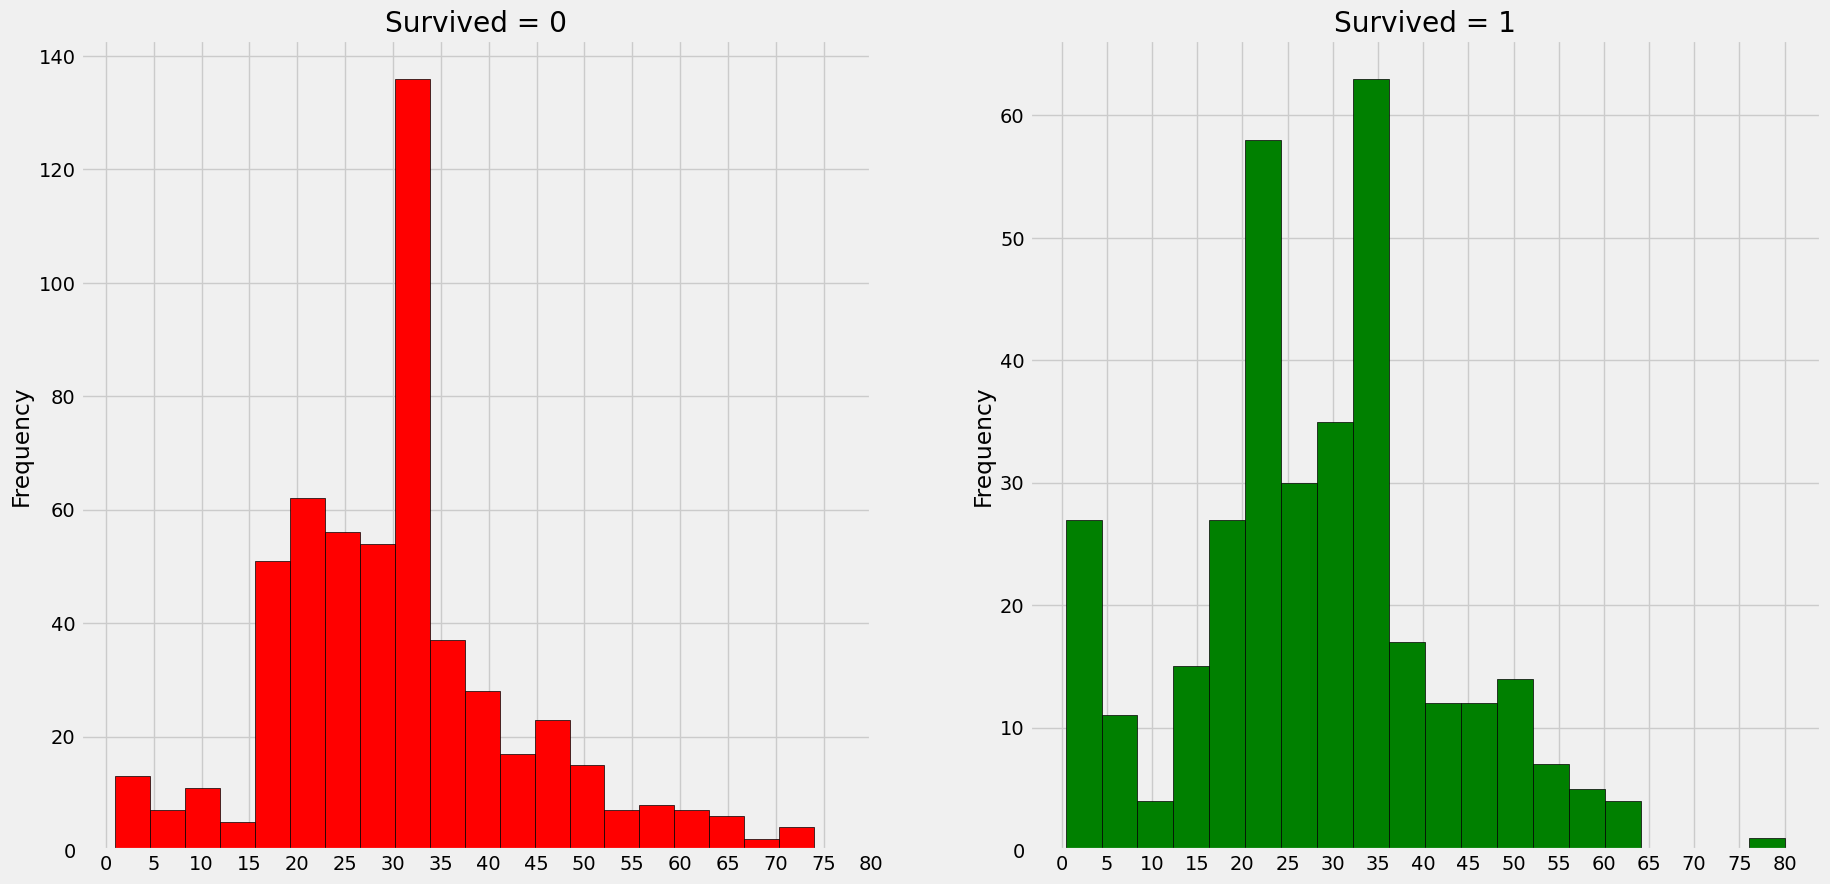

In [60]:
# Création de la visualisation
f, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].set_title("Survived = 0")
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

ax[1].set_title("Survived = 1")
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()

# On peut remarquer que les enfants de moins de 5ans ont été secourus en grand nombre
# Là où les personnes agées de 30 à 35ans sont morts en masse
# Tandis qu'une personne de 80 ans a été secourue

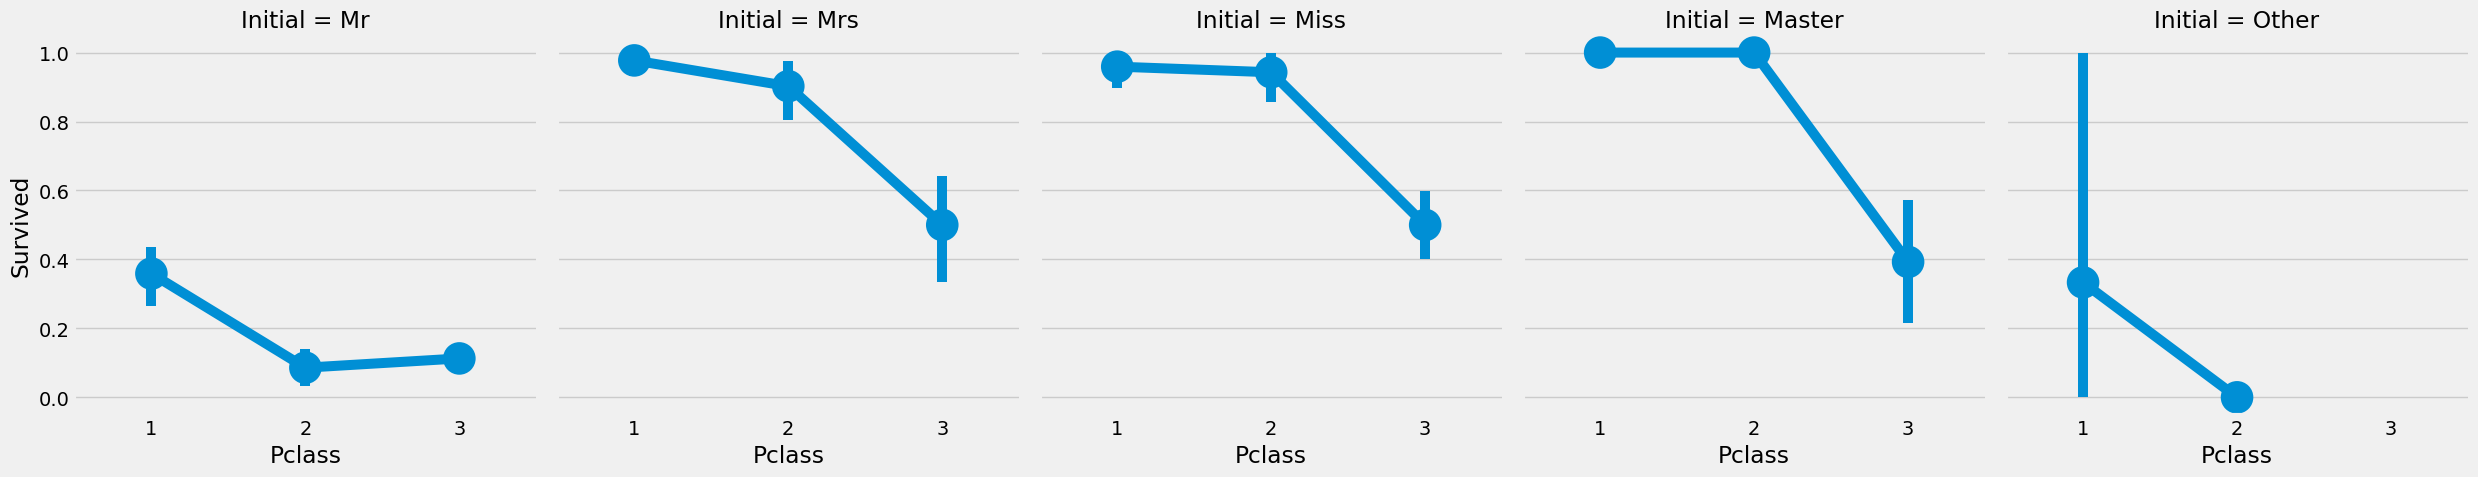

In [61]:
sns.catplot(data=data, x='Pclass', y='Survived', col='Initial', kind='point')
plt.show()

# On remarque encore une fois que les femmes et les enfants,
# indépendamment de leur classe, ont été sauvés

In [62]:
# Affiche le tableau croisé selon le sexe, la classe, l'endroit d'embarcation
# et le nombre de survivant

pd.crosstab([data.Embarked, data.Pclass], 
    [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

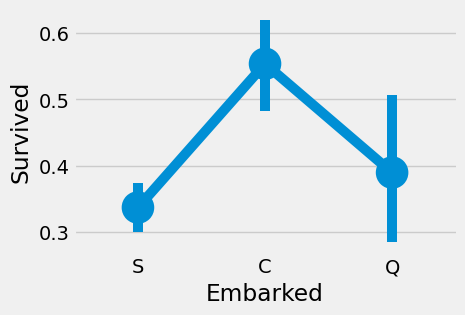

In [63]:
# Visualisation de la chance de survie selon le port d'embarcation 
# C = Cherbourg ; Q = Queenstown ; S = Southampton

sns.catplot(data=data, x='Embarked', y='Survived', kind='point')
fig = plt.gcf()             # obtenir la figure créée
fig.set_size_inches(5,3)    # pour la redimentionner
plt.show()

# Les personnes de Cherbourg avait plus de chance de survivre, 
# environ 55% contre 34% pour Southampton

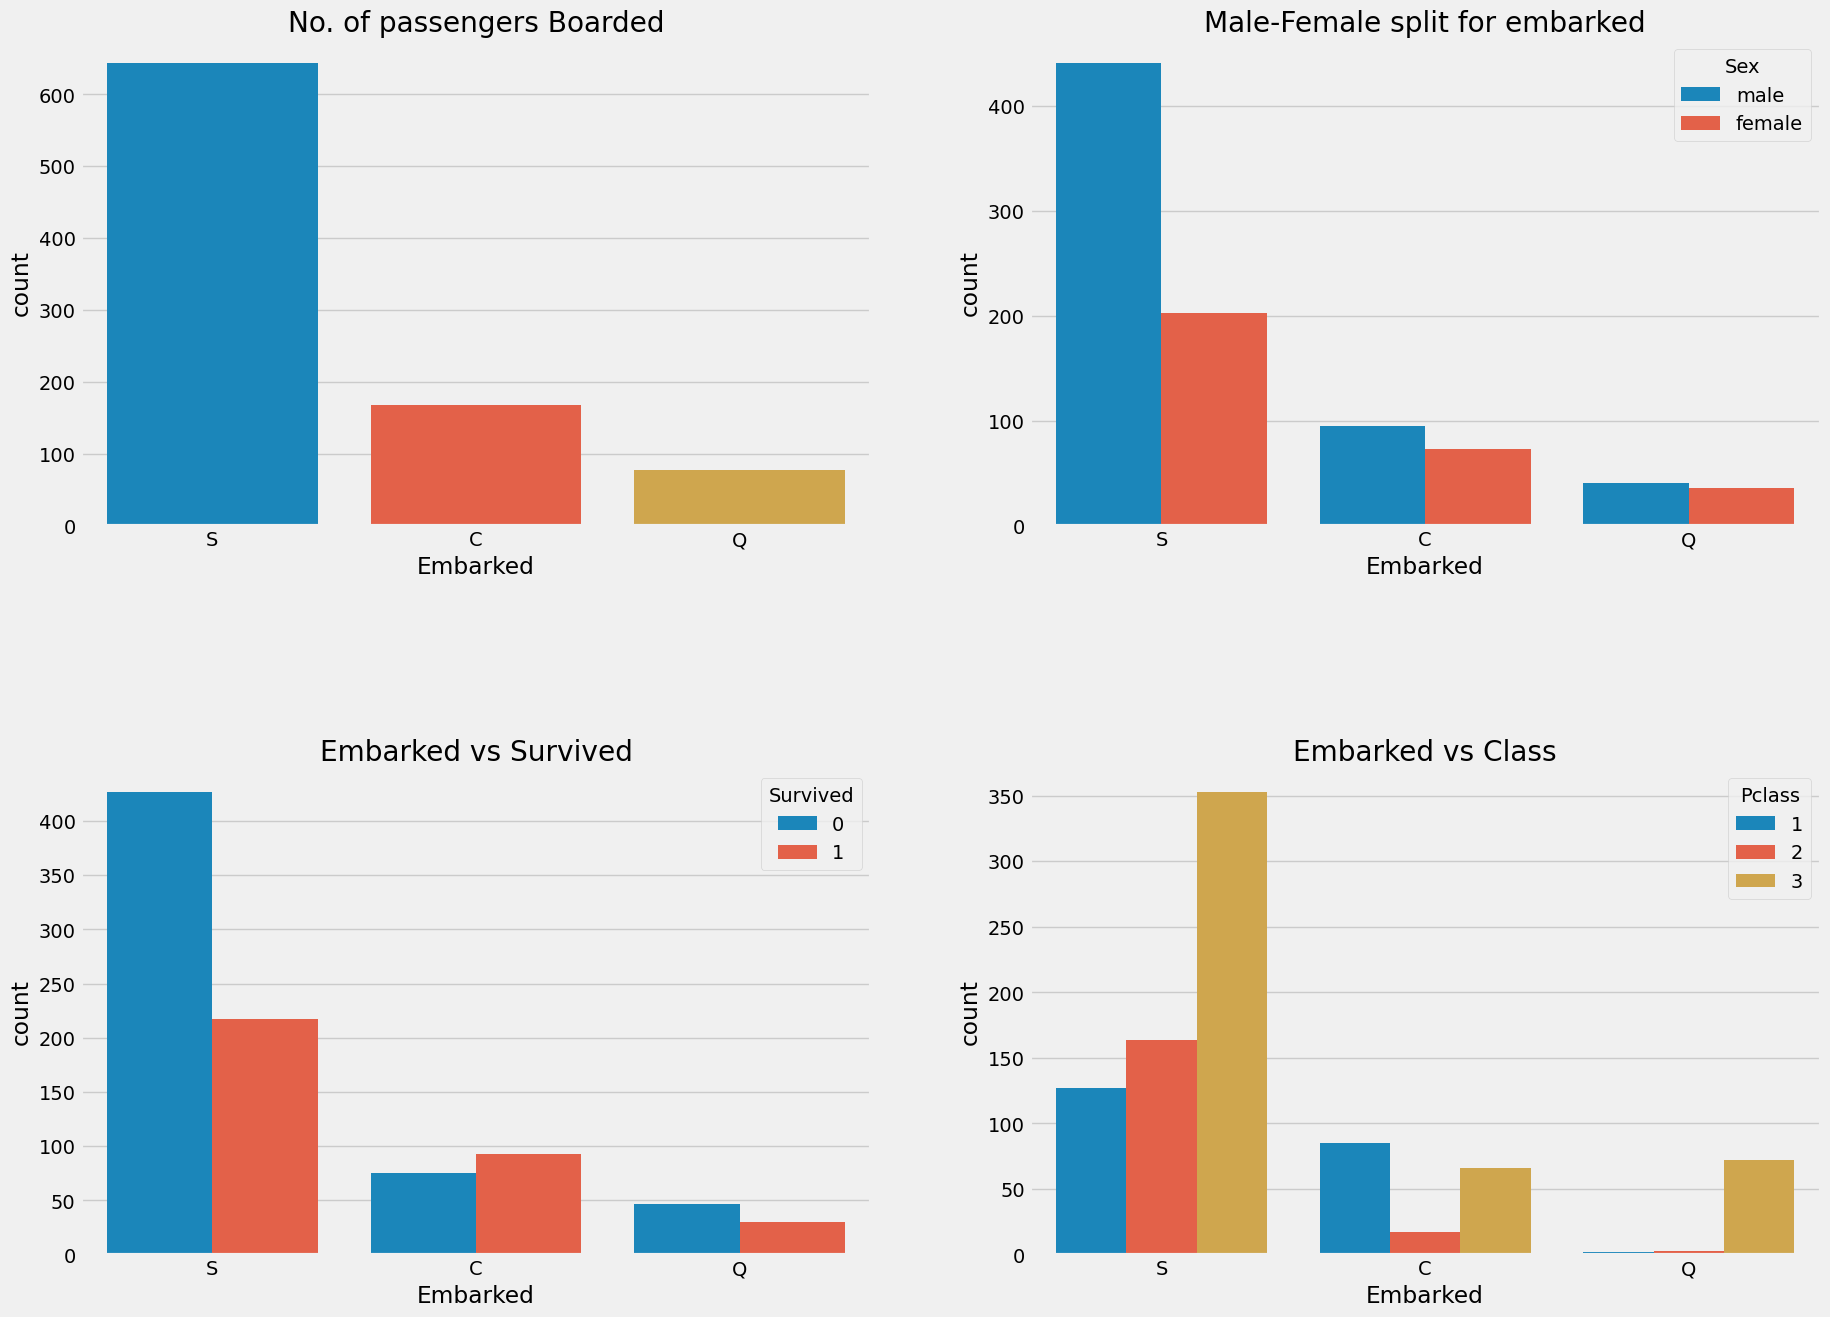

In [64]:
# Création de la visualisation 

f, ax = plt.subplots(2, 2, figsize=(20,15))

ax[0,0].set_title("No. of passengers Boarded")
sns.countplot(data=data, x='Embarked', ax=ax[0,0])

ax[0,1].set_title("Male-Female split for embarked")
sns.countplot(data=data, x='Embarked', hue='Sex', ax=ax[0,1])

ax[1,0].set_title("Embarked vs Survived")
sns.countplot(data=data, x='Embarked', hue='Survived', ax=ax[1,0])

ax[1,1].set_title("Embarked vs Class")
sns.countplot(data=data, x='Embarked', hue='Pclass', ax=ax[1,1])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Le port de S. a embarqué le plus de monde avec une majorité de 3e Class
# Les passagers de Cherbourg ont eu plus de chances de survie en terme de proportion
# Le port de S. a embarqué le plus de riche que les deux autres ports 
# Le port de Q. a embarqué 95% des passagers de 3e Class

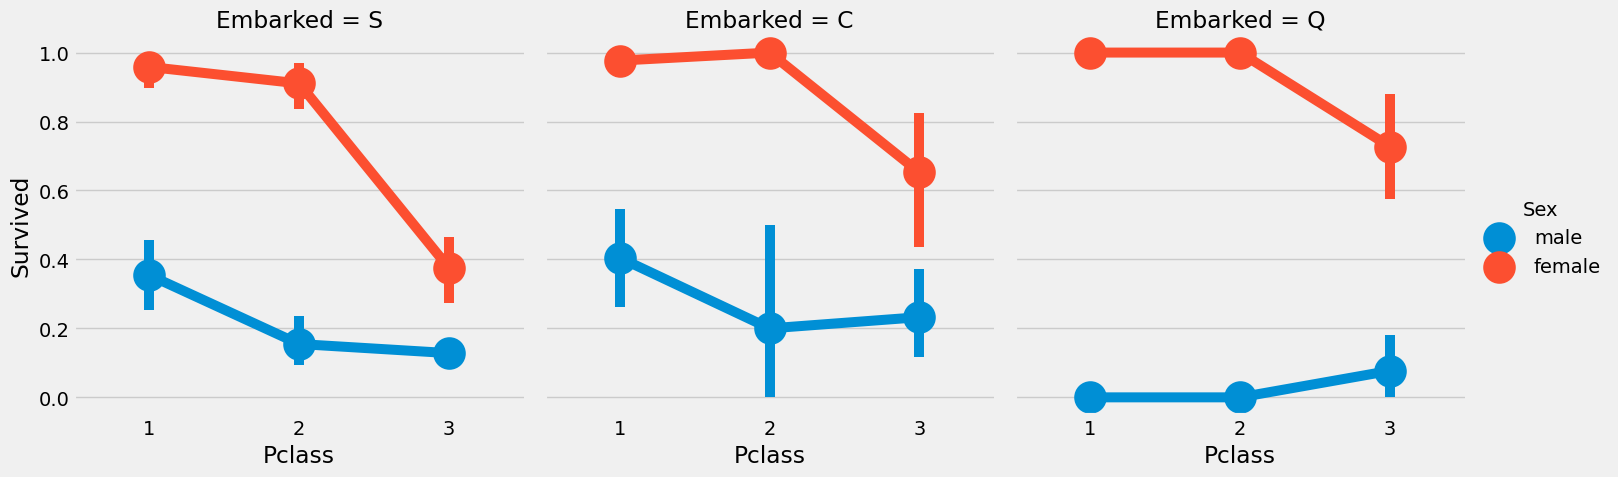

In [65]:
# Visualisation des données liées à l'embarcation

sns.catplot(data=data, x='Pclass', y='Survived', hue='Sex', col='Embarked', kind='point')
plt.show()

# Les femmes ont un taux de survie proche de 100 % pour la 1er et 2e Classe
# Les passagers de 3e classes de Southampton ont le moins de chance de survie

Maintenant que nous savons que le maximum de passager a embarqué au port de Southampton (S.),
nous pouvons remplacer les données manquantes NaN par S

In [66]:
data['Embarked'].fillna('S', inplace=True)

data.Embarked.isnull().any()    # On vérifie qu'on a plus de champ NaN 

False

In [67]:
# On peut regarder si les personnes sont venus seuls ou en famille
# SibSp = Sibling Spouse

pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


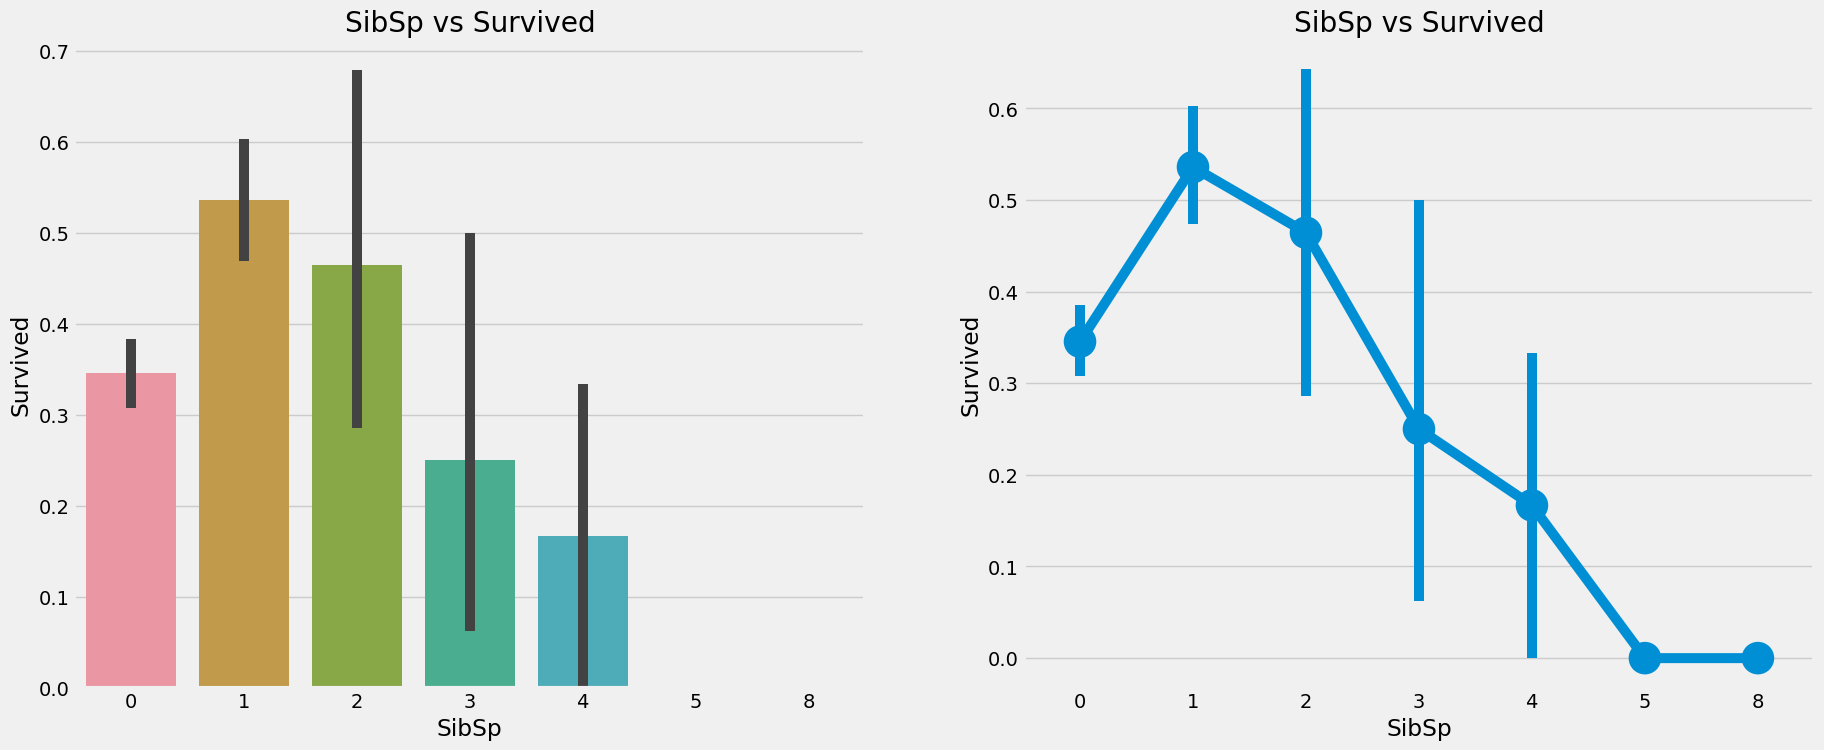

In [68]:
# Création de la visualisation du tableau précédent

f, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].set_title("SibSp vs Survived")
sns.barplot(data=data, x='SibSp', y='Survived', ax=ax[0])

ax[1].set_title("SibSp vs Survived")
sns.pointplot(data=data, x='SibSp', y='Survived', ax=ax[1])

plt.show()

In [69]:
# Répartition des personnes seules ou accompagnés selon leur Classe

pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

# On remarque que les 3e classes sont venus en famille pour refaire leur vie à NY
# Contrairement au 1er et 2e classe qui ont moins d'enfants avec eux (max 2 enfants + mari ou femme)

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [70]:
# Montrer les nombres de familles selon la classe
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


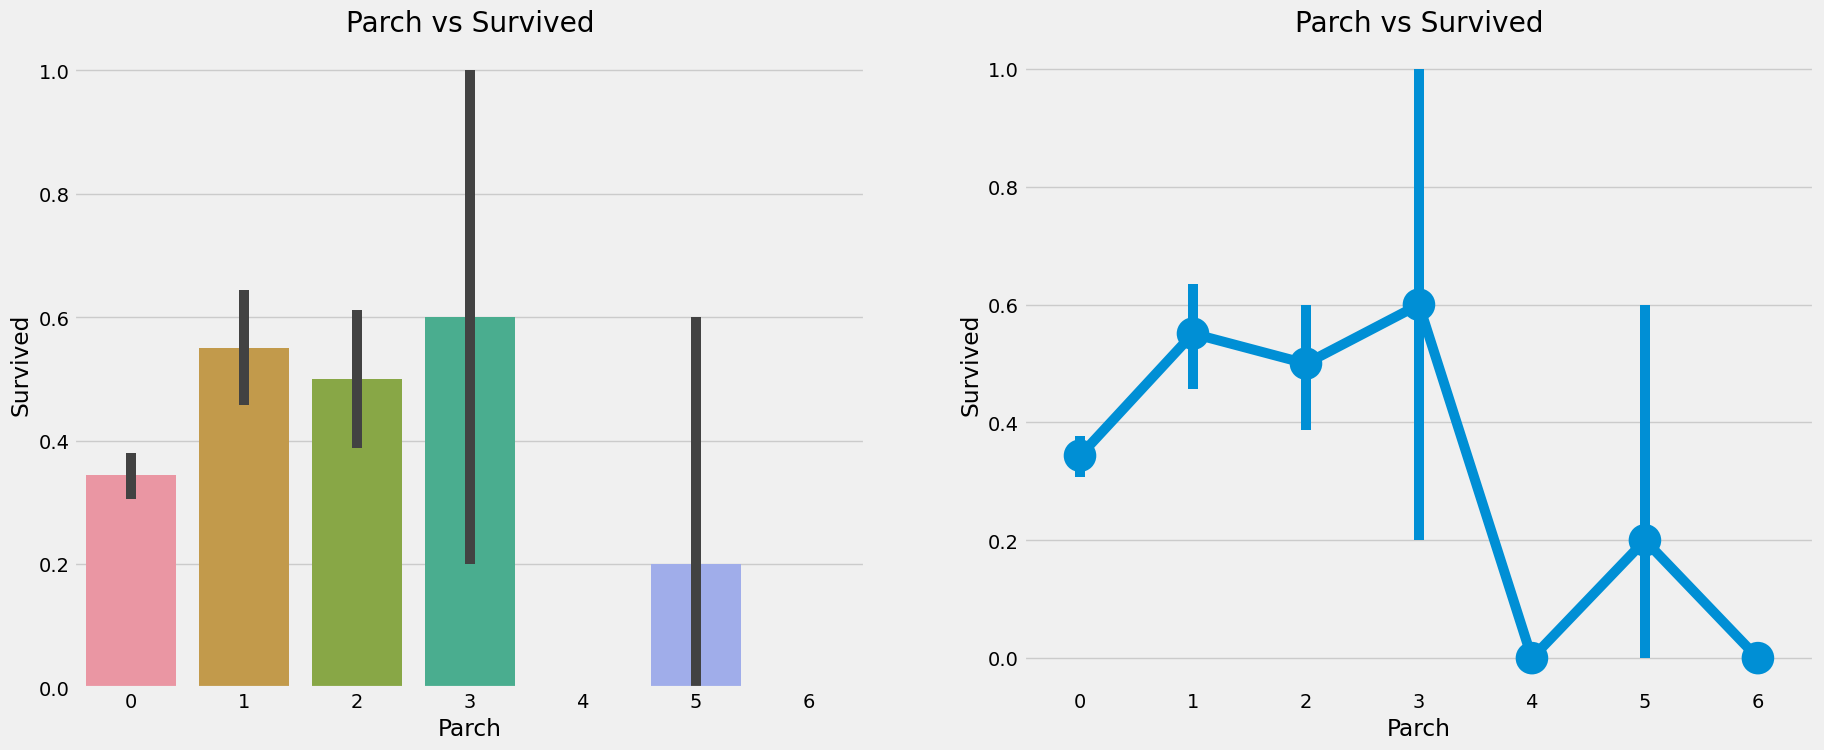

In [71]:
# Visualisation taile de famille vs survived

f, ax = plt.subplots(1, 2, figsize=(20,8))

ax[0].set_title("Parch vs Survived")
sns.barplot(data=data, x='Parch', y='Survived', ax=ax[0])

ax[1].set_title("Parch vs Survived")
sns.pointplot(data=data, x='Parch', y='Survived', ax=ax[1])

plt.show()

# On peut voir que les chances de survies pour un passager ayant au moins 
# un membre de sa famille est bonne jusqu'à 3 membres, 
# au-delà les chances diminuent

In [72]:
# Données autour du Prix du ticket

print("Highest fare was:", data['Fare'].max())
print("Lowest fare was:", data['Fare'].min())   # Un ticket gratuit pour la mort
print("Average fare was", data['Fare'].mean())

Highest fare was: 512.3292
Lowest fare was: 0.0
Average fare was 32.204207968574636


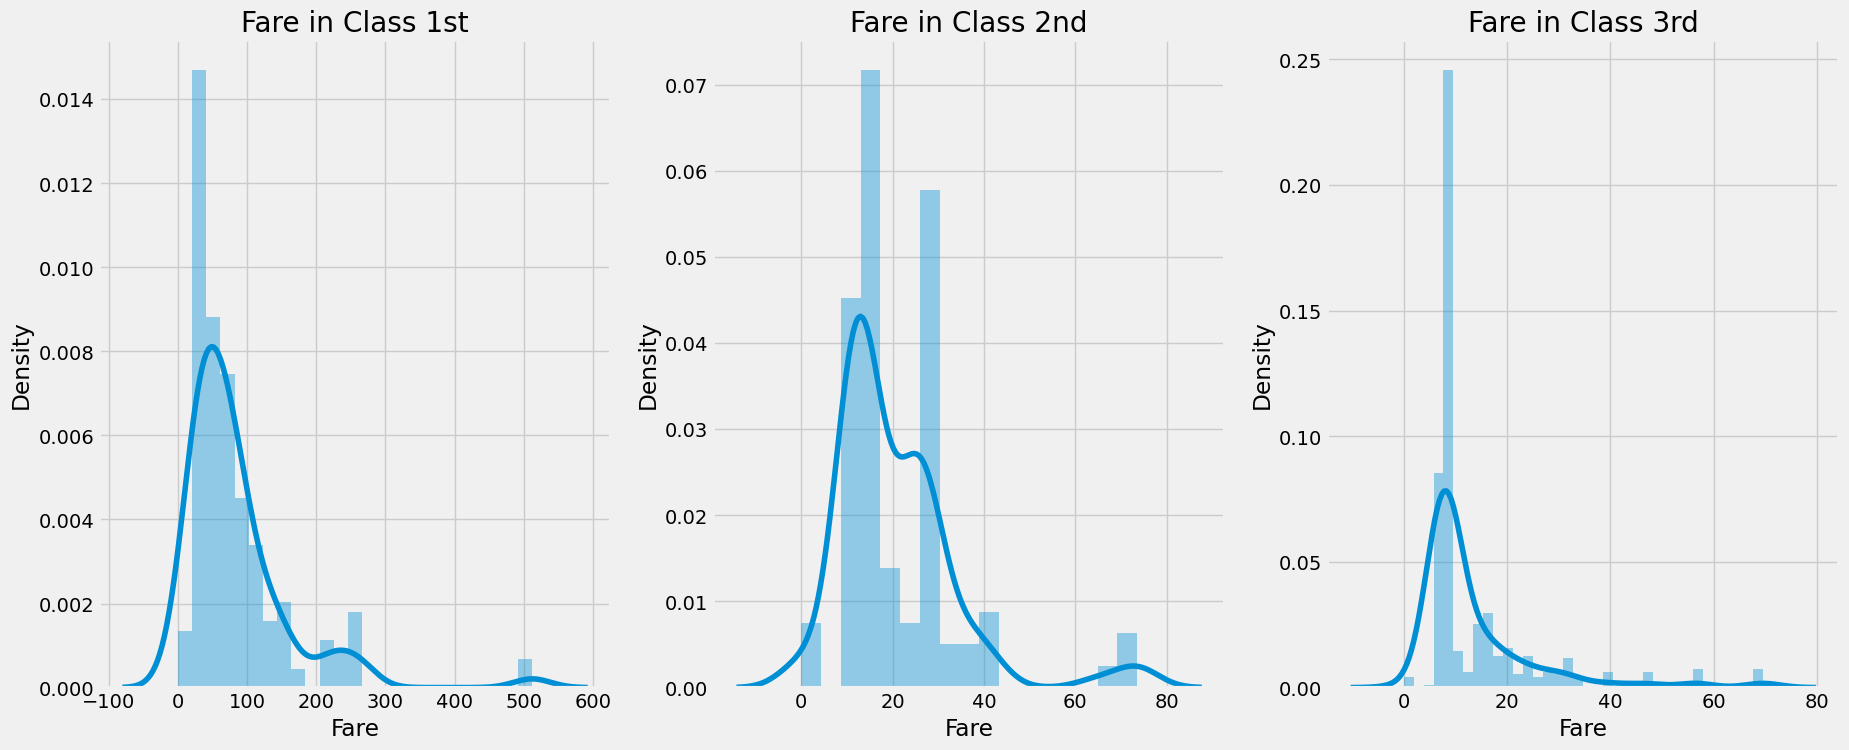

In [73]:
# Visualisation autour des prix du ticket selon 
# la classe des passagers

f, ax = plt.subplots(1, 3, figsize=(20,8))

ax[0].set_title("Fare in Class 1st")
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0]);

ax[1].set_title("Fare in Class 2nd")
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1]);

ax[2].set_title("Fare in Class 3rd")
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2]);

#### Observation suite à l'Analyse des caractèristiques

- Les chances de survie des femmes étaient supérieur à celles des hommes
- Il y a une tendance visible -> les passagés de 1er classe ont plus de chance de survie, tandis que les chances de survie de la 3e classe est très faible. Les femmes de premiere classe avait presque 100% de chance de survivre (95-96%) comme pour la 2nd Classe même si légèrement plus faible.
- Les enfants entre 5 et 10ans avaient des chances de survie plus forte que les autres tranches d'age. Par exemple: les passagers entre 15 et 35 ans sont ceux qui ont compté le plus de morts.
- Le port d'embarquement est une caractéristique intéressante. Elle montre que les personnes ayant embarqué à Cherbourg ont eu plus de chance que les personnes de Southampton, même au niveau de la 1er Classes. Les passagers de Queenstown sont quant à eux que des 3e Classes.
- Enfin, avoir un à trois membres de sa famille permettaient d'avoir de plus grande chance de survivre contraireent aux personnes seules ou avec une famille nombreuse.

### Trouver des relations et corrélation entre les caractéristiques 

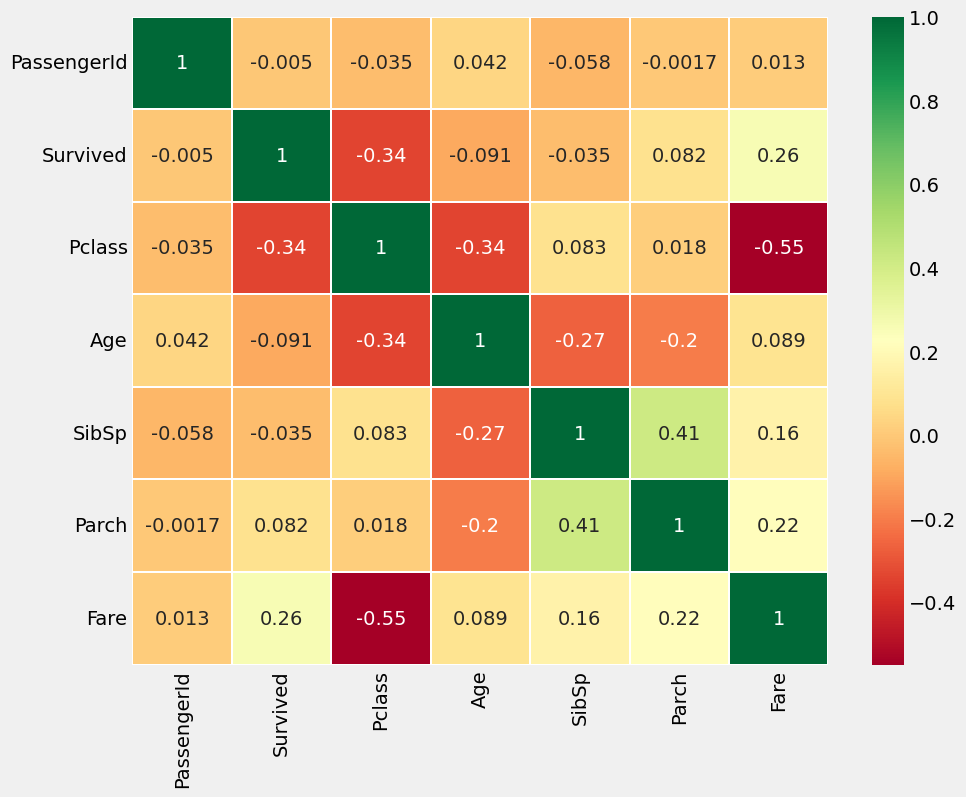

In [74]:
# Création d'une HeatMap avec les données précédentes pour voir les relations entres elles

sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)     # corr -> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# La HeatMap n'apporte pas une grande lecture en terme de corrélation
# toutefois, on peut remarqué une corrélation positive entre Parch et SibSp

## Partie 2 : Ingénierie des Caractèristiques et Data Cleaning

Dans un dataset, toutes les caractéristiques ne sont pas nécessairement importantes.
Il se peut qu'un certain nombre de données soient redondantes et doivent donc être éliminés.

On peut également obtenir ou rajouter de nouvelles données pour compléter notre dataset.
Elles peuvent provenir d'analyse des autres caractéristiques de notre jeu de données
Nous l'avons par exemple fait en obtenant les Initials (M., Miss, Other...) à partir de 
la caractéristique : Name.

Nous allons maintenant supprimer, ainsi qu'obtenir de nouvelles caractéristiques et même
transformer certaines caractéristiques pertinentes en une forme approprié à la modélisation
prédictive de notre 3e partie ;) 


____________________________________________________________________________________________________________

__Age_band__ : la caractéristique Age est une variable continue, or nous avons besoin d'une variable catégorielle.
Nous allons donc la convertir, soit par "binning" ou par normalisation.

Ici on utilisera le "binning", cad regrouper une gamme d'age dans une seule catégorie ou leur attribuer une seule valeur. La plage d'age va de 0 à 80 ans qu'on va diviser arbitrairement par 5 : 80/5 = 16. Donc des tranches d'age de 16 ans.

In [75]:
data['Age_band'] = 0    # initialisation de la colonne

data.loc[data['Age'] <= 16, 'Age_band'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age_band'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age_band'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age_band'] = 3
data.loc[data['Age'] > 64, 'Age_band'] = 4

data.head(2)    # Verification de l'ajout des tranches d'age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [76]:
# Visualisation de la somme des passagers pour chaque tranche d'age

data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


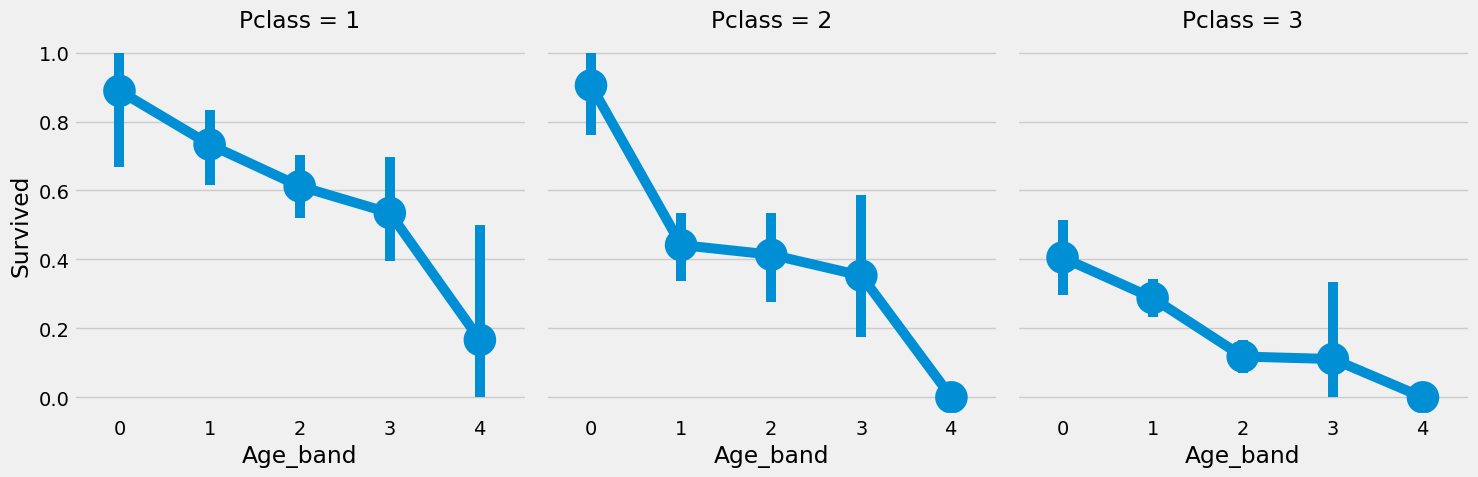

In [77]:
# Visualisation de la répartition des age en graph

sns.catplot(data=data, x='Age_band', y='Survived', col='Pclass', kind='point', ax=ax[0])
plt.show()

# On aperçoit que le taux de survie décroit avec l'age

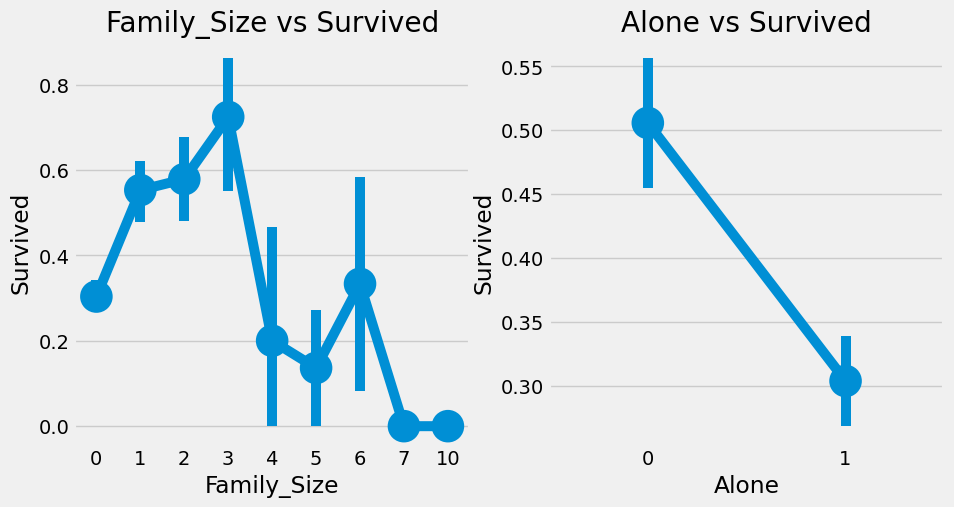

In [78]:
# On peut également segmenter les passagers voyageant seuls des passagers en famille
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']     # détermine la taille de la famille

data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1     # détermine les personnes voyageant seuls

# Création du graph Famille vs Survived / Alone vs Survived
f, ax = plt.subplots(1, 2, figsize=(10,5))

ax[0].set_title("Family_Size vs Survived")
sns.pointplot(data=data, x='Family_Size', y='Survived', ax=ax[0])

ax[1].set_title("Alone vs Survived")
sns.pointplot(data=data, x='Alone', y='Survived', ax=ax[1])

plt.show()

# L'observation montre qu'à partir de 4 personnes dans la famille le taux de survie diminue, 
# tout comme pour les personnes voyageant seuls.

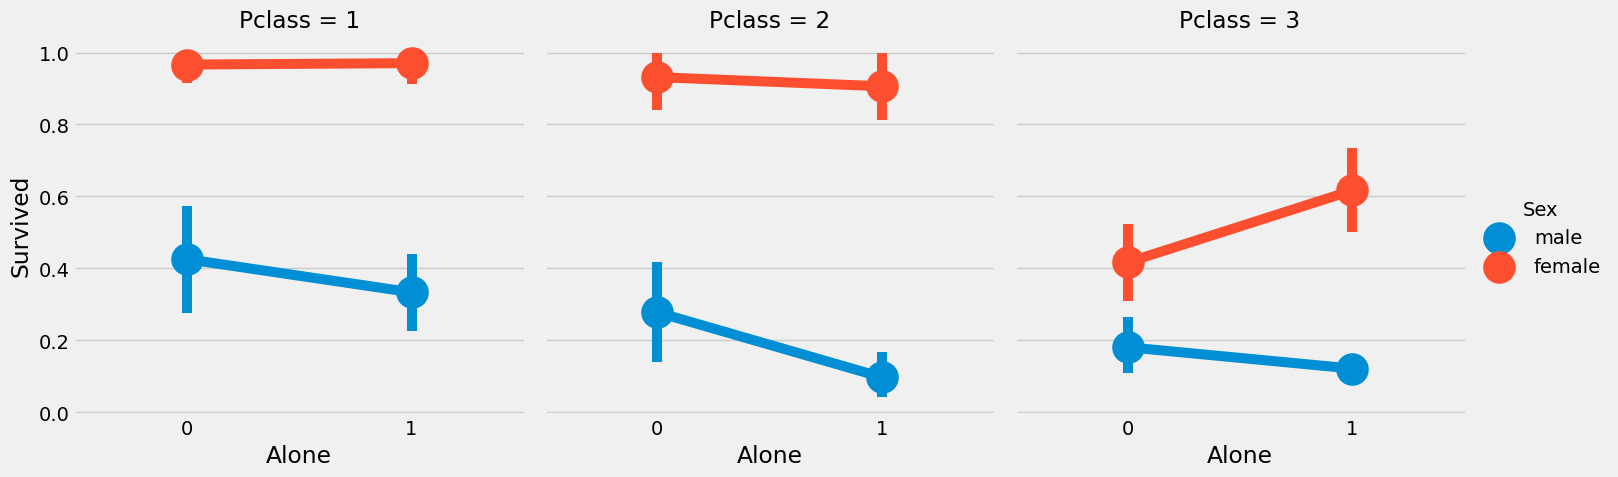

In [79]:
# Visualisation des graphiques : Alone vs Classe

sns.catplot(data=data, x='Alone', y='Survived', col='Pclass', hue='Sex', kind='point')
plt.show()

# Le fait d'être seul est néfaste pour sa survie, 
# peut importe la classe sociale ou le sexe.
# On remarque que pour la 3e classe les femmes seules,
# on plus de chance de survivre que les personnes en famille

In [80]:
# Les prix du ticket est également une valeur continue
# nous allons donc les convertir en valeur ordinale
# On utilisera la fonction qcut (pandas).
# La fonction va diviser ou arranger les valeurs 
# selon le nombre de tranches souhaitées.

data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(data['Fare_Range'])['Survived'].mean().to_frame()\
    .style.background_gradient(cmap='summer_r')

# On peut constater que l'augmentation du prix du billet, 
# augmente également les chances de survie.

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


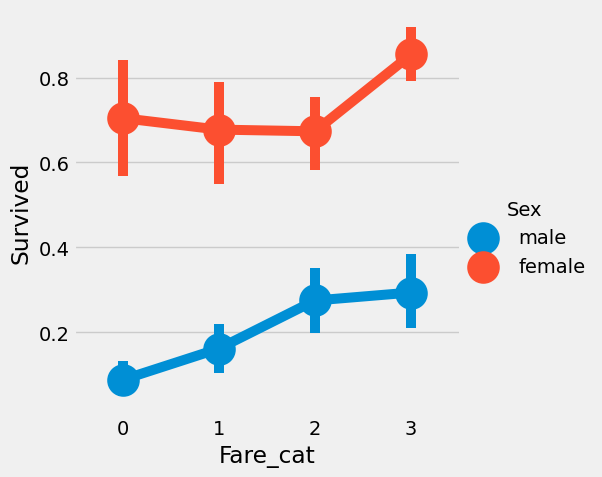

In [81]:
# Nous pouvons maintenant assigner les tranches de Fare_Range
# à un numéro spécifique

data['Fare_cat'] = 0
data.loc[data['Fare'] <= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31.0), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare'] <= 512.329), 'Fare_cat'] = 3

# Visualisation Fare_cat vs Survived / Sex
sns.catplot(data=data, x='Fare_cat', y='Survived', hue='Sex', kind='point')
plt.show()

# Clairement on voit bien que le prix du billet
# augmente les chances de survie, indépendamment du sexe

In [82]:
# Maintenant nous avons besoin de convertir nos strings (Sex, Embarked,...)
# en valeur numérique, si nous voulons les faire passer dans un algo de Machine Learning

data['Sex'].replace(['male','female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],\
    [0,1,2,3,4], inplace=True)

Nous allons supprimer de notre jeu de données, les caractéristiques dont nous n'avons pas besoin pour l'analyse comme :

- __Name:__ Ne peut être convertie en valeur catégorielle.
- __Age:__ Nous avons déjà la fonction Age_band.
- __Ticket:__ C'est une chaîne aléatoire qui ne peut pas être catégorisée.
- __Fare:__ Nous avons déjà la fonction Fare_cat.
- __Cabin:__ Beaucoup de valeurs NaN ; beaucoup de passagers ont plusieurs cabines. 
C'est donc une fonctionnalité inutile.
- __Fare_Range:__ Nous avons la caractéristique Fare_cat.
- __PassengerId:__ Ne peut être catégorisé.

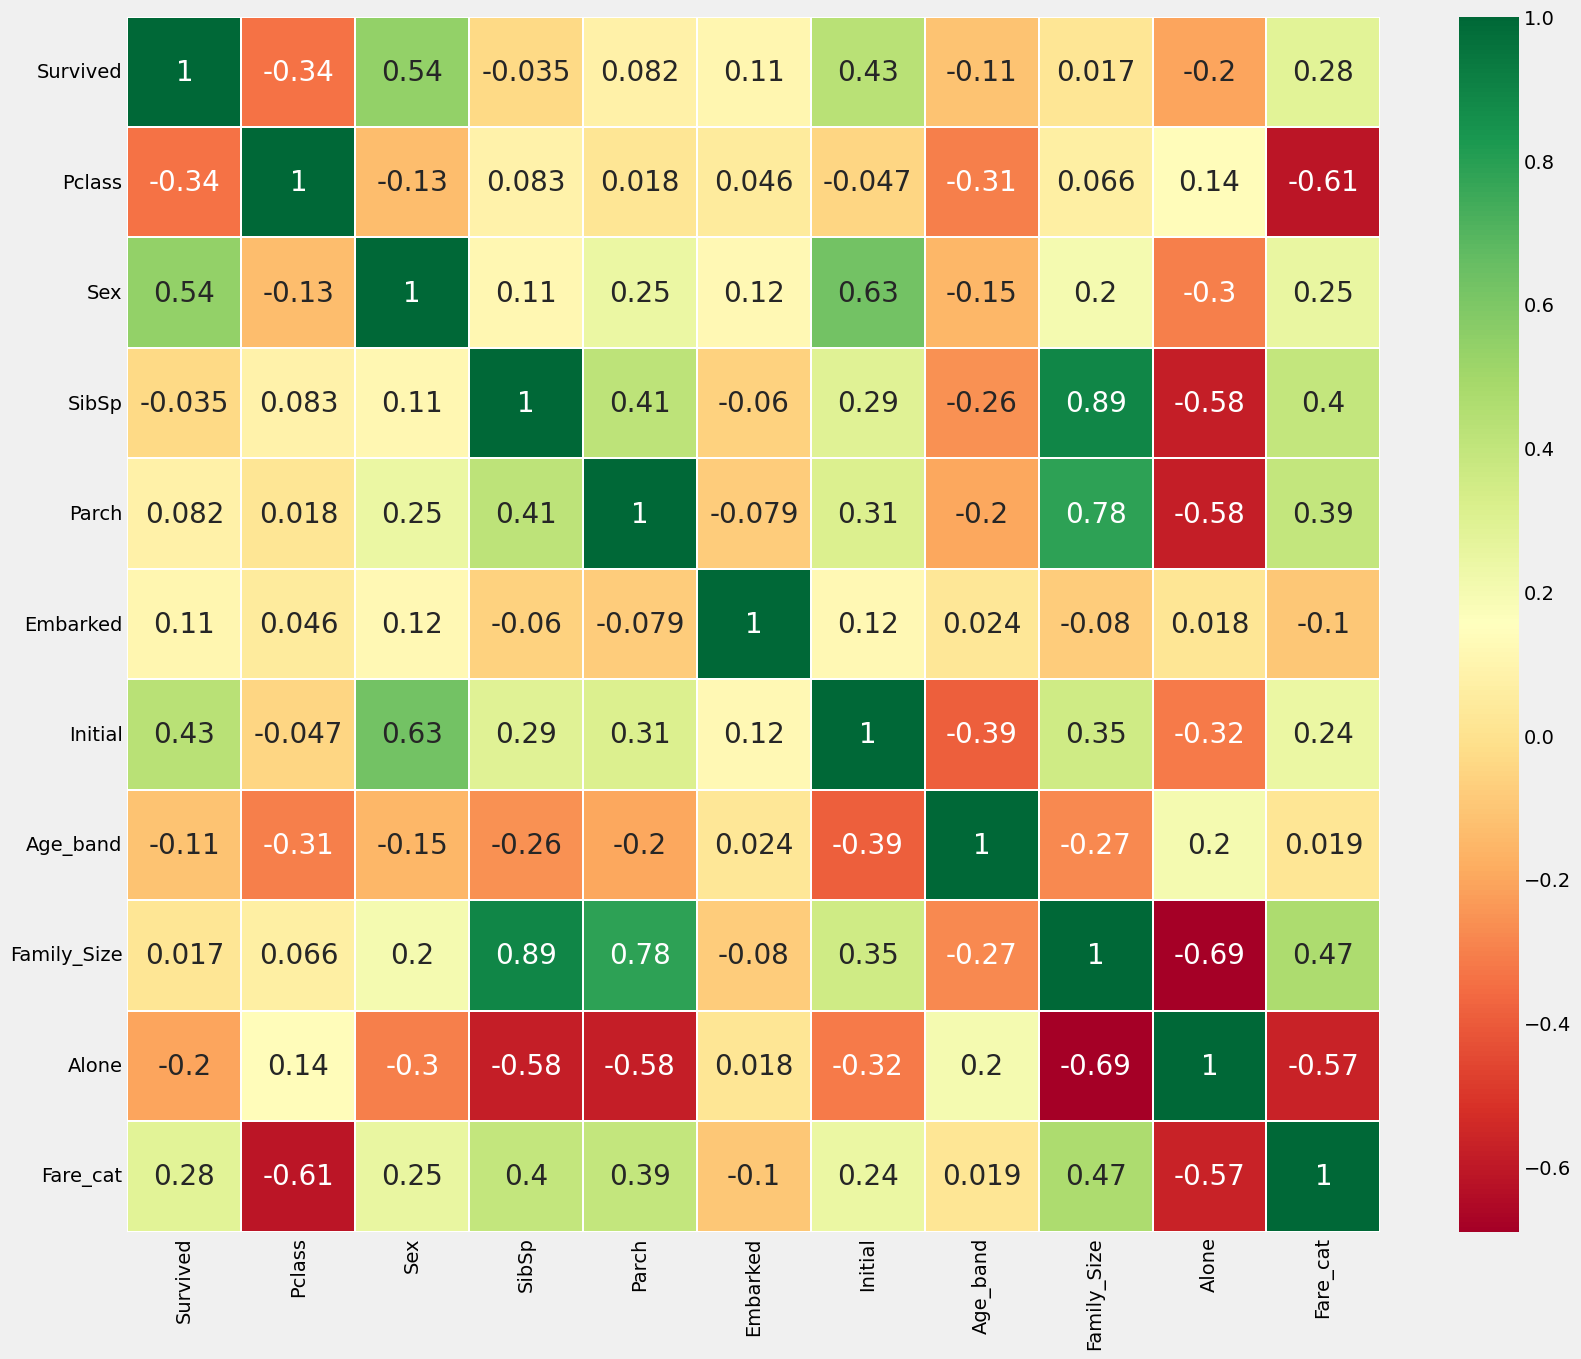

In [83]:
# Suppresion des données non utiles pour la suite
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range', 'PassengerId'],\
    axis=1, inplace=True)

# Visualisation de la HeatMap pour observer de nouvelles corrélations
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn',\
    linewidths=0.2, annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# On remarque ainsi des corrélations positives : SibSp vs Family_Size ou Parch vs Family_size
# et des corrélations négatives : Alone vs Family_size

<h1><center> The End </center></h1>